In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('regression.xlsx', header=0)
G = data.G
H = data.H
Y = data.Y


In [3]:
data

,G,H,Y
0,73,7.3,3096
1,87,-6.0,3519
2,83,-3.7,3383
3,78,2.5,3261
4,82,-2.2,3360
5,80,0.7,3334
6,83,-2.9,3388
7,86,-6.2,3481
8,75,5.1,3120
9,82,-1.3,3378


In [4]:
print('G shape',G.shape)

G shape (20,)


In [5]:
G #column matrix of size 1

0     73
1     87
2     83
3     78
4     82
5     80
6     83
7     86
8     75
9     82
10    80
11    82
12    77
13    81
14    79
15    78
16    76
17    80
18    80
19    81
Name: G, dtype: int64

In [6]:
one_col = np.ones(np.size(G))
X2 = np.column_stack((one_col,G,H))

X1 = np.column_stack((one_col,G,H, G*H))


In [7]:
X1

array([[ 1.000e+00,  7.300e+01,  7.300e+00,  5.329e+02],
       [ 1.000e+00,  8.700e+01, -6.000e+00, -5.220e+02],
       [ 1.000e+00,  8.300e+01, -3.700e+00, -3.071e+02],
       [ 1.000e+00,  7.800e+01,  2.500e+00,  1.950e+02],
       [ 1.000e+00,  8.200e+01, -2.200e+00, -1.804e+02],
       [ 1.000e+00,  8.000e+01,  7.000e-01,  5.600e+01],
       [ 1.000e+00,  8.300e+01, -2.900e+00, -2.407e+02],
       [ 1.000e+00,  8.600e+01, -6.200e+00, -5.332e+02],
       [ 1.000e+00,  7.500e+01,  5.100e+00,  3.825e+02],
       [ 1.000e+00,  8.200e+01, -1.300e+00, -1.066e+02],
       [ 1.000e+00,  8.000e+01,  8.000e-01,  6.400e+01],
       [ 1.000e+00,  8.200e+01, -2.400e+00, -1.968e+02],
       [ 1.000e+00,  7.700e+01,  2.900e+00,  2.233e+02],
       [ 1.000e+00,  8.100e+01, -1.500e+00, -1.215e+02],
       [ 1.000e+00,  7.900e+01,  1.100e+00,  8.690e+01],
       [ 1.000e+00,  7.800e+01,  1.900e+00,  1.482e+02],
       [ 1.000e+00,  7.600e+01,  3.500e+00,  2.660e+02],
       [ 1.000e+00,  8.000e+01,

In [8]:
def fit(X, Y):
        # coeff_matrix = inv(X'.X).(X'Y)
        coeff = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(Y))
        return coeff


In [9]:
print('       G   H')
print('MIN ->', min(G), min(H))
print('MAX ->',max(G), max(H))

       G   H
MIN -> 73 -6.2
MAX -> 87 7.3


In [10]:
#To plot surface get some equally spaced values of G and H
G1 = np.linspace(min(G), max(G), 30)
H1 = np.linspace(min(H), max(H), 30)


#This is required for plotting surface
G1, H1 = np.meshgrid(G1, H1)


In [11]:
H1.shape

(30, 30)

In [12]:
G1,H1

(array([[73.        , 73.48275862, 73.96551724, 74.44827586, 74.93103448,
         75.4137931 , 75.89655172, 76.37931034, 76.86206897, 77.34482759,
         77.82758621, 78.31034483, 78.79310345, 79.27586207, 79.75862069,
         80.24137931, 80.72413793, 81.20689655, 81.68965517, 82.17241379,
         82.65517241, 83.13793103, 83.62068966, 84.10344828, 84.5862069 ,
         85.06896552, 85.55172414, 86.03448276, 86.51724138, 87.        ],
        [73.        , 73.48275862, 73.96551724, 74.44827586, 74.93103448,
         75.4137931 , 75.89655172, 76.37931034, 76.86206897, 77.34482759,
         77.82758621, 78.31034483, 78.79310345, 79.27586207, 79.75862069,
         80.24137931, 80.72413793, 81.20689655, 81.68965517, 82.17241379,
         82.65517241, 83.13793103, 83.62068966, 84.10344828, 84.5862069 ,
         85.06896552, 85.55172414, 86.03448276, 86.51724138, 87.        ],
        [73.        , 73.48275862, 73.96551724, 74.44827586, 74.93103448,
         75.4137931 , 75.89655172, 7

In [13]:
ans1 = fit(X1, Y)
ans2 = fit(X2, Y)

In [14]:
ans2.shape

(3,)

In [15]:
B0_1 = ans1[0]
B1_1 = ans1[1]
B2_1 = ans1[2]
B3_1 = ans1[3]

B0_2 = ans2[0]
B1_2= ans2[1]
B2_2 = ans2[2]

print('Coeff 1', B0_1, B1_1, B2_1, B3_1)
print('Coeff 2', B0_2, B1_2, B2_2)

Coeff 1 -791.3944992274046 51.17461805953644 7.296678889659233 0.17191688841694486
Coeff 2 -751.1642331423802 50.648589176449754 20.50473330735345


In [16]:
Z1 = B0_2 + B1_2*G1 + B2_2*H1

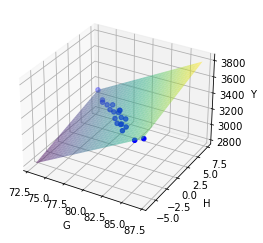

In [17]:
#Here we are plotting the points in 3D
plt.figure(figsize=(4, 4))
ax = plt.axes(projection='3d')
ax.scatter3D(G, H, Y, color='blue')


#We are plotting the surface as shown in figure
ax.plot_surface(G1, H1, Z1, alpha=0.5, cmap='viridis', linewidth=0)


ax.set_xlabel('G')
ax.set_ylabel('H')
ax.set_zlabel('Y')
plt.show()


In [18]:
Z2 = B0_1 + B1_1*G1 + B2_1*H1 + B3_1*G1*H1

In [19]:
Z2.shape

(30, 30)

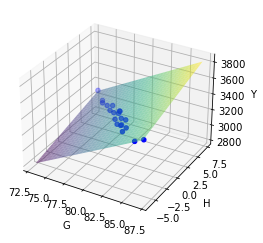

In [20]:
plt.figure(figsize=(4, 4))
ax = plt.axes(projection='3d')
ax.scatter3D(G, H, Y, color='blue')


#We are plotting the surface as shown in figure
ax.plot_surface(G1, H1, Z2, alpha=0.5, cmap='viridis', linewidth=0)


ax.set_xlabel('G')
ax.set_ylabel('H')
ax.set_zlabel('Y')
plt.show()


In [23]:
rmse1 = np.sqrt(
    np.mean((Y - X1.dot(ans1))**2)
)
rmse1

12.302900752505728

In [24]:
rmse2 = np.sqrt(
    np.mean((Y - X2.dot(ans2))**2)
)
rmse2

12.567883566591028